In [34]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
## Importando as bibliotecas necessarias
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
import joblib


In [5]:
df = pd.read_csv('../Resultados/all.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,4429.13,131.57,-316.24,17.7,8909.00,7.00,-173.00,9.00,6820.84,-217.88,...,17.64,5057.8,138.32,42.94,89.68,7981.04,61.64,-140.03,-93.8,0
1,6305.88,187.32,-450.24,25.2,11759.88,9.24,-228.36,11.88,9575.41,-305.87,...,30.24,6788.1,185.64,57.63,120.36,10959.04,84.64,-192.28,-128.8,0
2,9984.31,296.59,-712.88,39.9,16748.92,13.16,-325.24,16.92,12723.49,-406.43,...,52.92,9583.2,262.08,81.36,169.92,18701.84,144.44,-328.13,-219.8,0
3,12611.76,374.64,-900.48,50.4,20847.06,16.38,-404.82,21.06,16133.91,-515.37,...,60.48,13310.0,364.00,113.00,236.00,22037.20,170.20,-386.65,-259.0,0
4,16064.98,477.22,-1147.04,64.2,24677.93,19.39,-479.21,24.93,20462.52,-653.64,...,69.72,17036.8,465.92,144.64,302.08,24776.96,191.36,-434.72,-291.2,0


In [6]:
print(df.shape)

(21748, 81)


In [7]:
print(df[80].unique())

[0 1]


In [14]:
from pandas.plotting import scatter_matrix
from matplotlib import cm
feature_df = df.iloc[:,0:80]
X = np.asarray(feature_df)
y = np.asarray(df.iloc[:,80])
#cmap = cm.get_cmap('gnuplot')
#scatter = pd.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
#plt.suptitle('Scatter-matrix for each input variable')
#plt.savefig('fruits_scatter_matrix')

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig("/tmp/confusion.png", dpi=300)
    plt.show()

### Logistic Regression

Accuracy of Logistic regression classifier on training set: 0.99
Accuracy of Logistic regression classifier on test set: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       304
           1       1.00      1.00      1.00      5133

    accuracy                           1.00      5437
   macro avg       1.00      1.00      1.00      5437
weighted avg       1.00      1.00      1.00      5437

Confusion matrix, without normalization
[[ 302    2]
 [   2 5131]]


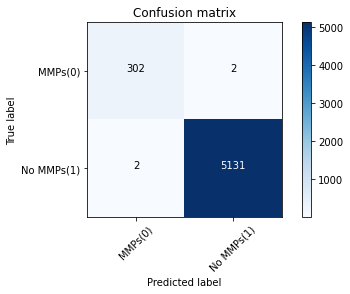

In [36]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
cnf_matrix=confusion_matrix(y_test, pred)
print(classification_report(y_test, pred))
plot_confusion_matrix(cnf_matrix, classes=['MMPs(0)','No MMPs(1)'],normalize=False,  title='Confusion matrix')


### Decision Tree

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       304
           1       1.00      1.00      1.00      5133

    accuracy                           1.00      5437
   macro avg       1.00      1.00      1.00      5437
weighted avg       1.00      1.00      1.00      5437

Confusion matrix, without normalization
[[ 302    2]
 [   2 5131]]


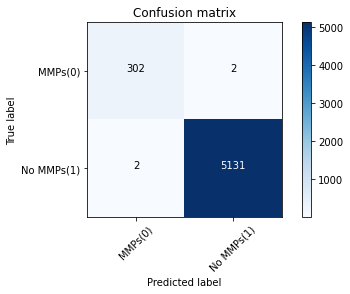

In [35]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
pred = clf.predict(X_test)
cnf_matrix=confusion_matrix(y_test, pred)
print(classification_report(y_test, pred))
plot_confusion_matrix(cnf_matrix, classes=['MMPs(0)','No MMPs(1)'],normalize=False,  title='Confusion matrix')


### KNN

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       1.00      1.00      1.00      5133

    accuracy                           1.00      5437
   macro avg       1.00      1.00      1.00      5437
weighted avg       1.00      1.00      1.00      5437

Confusion matrix, without normalization
[[ 304    0]
 [   0 5133]]


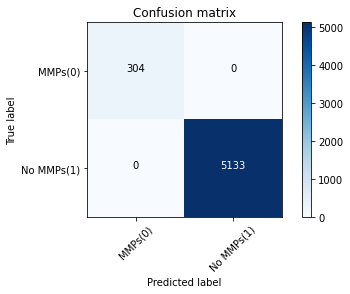

In [37]:
## Knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))
pred = knn.predict(X_test)
cnf_matrix=confusion_matrix(y_test, pred)
print(classification_report(y_test, pred))
plot_confusion_matrix(cnf_matrix, classes=['MMPs(0)','No MMPs(1)'],normalize=False,  title='Confusion matrix')


### Linear Discriminant

Accuracy of LDA classifier on training set: 1.00
Accuracy of LDA classifier on test set: 1.00
              precision    recall  f1-score   support

           0       1.00      0.91      0.96       304
           1       0.99      1.00      1.00      5133

    accuracy                           1.00      5437
   macro avg       1.00      0.96      0.98      5437
weighted avg       1.00      1.00      1.00      5437

Confusion matrix, without normalization
[[ 278   26]
 [   0 5133]]


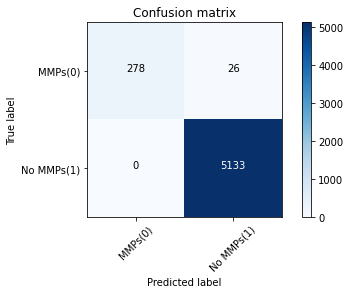

In [38]:
## Linear Discriminant
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))
pred = lda.predict(X_test)
cnf_matrix=confusion_matrix(y_test, pred)
print(classification_report(y_test, pred))
plot_confusion_matrix(cnf_matrix, classes=['MMPs(0)','No MMPs(1)'],normalize=False,  title='Confusion matrix')


### Gaussian naive

Accuracy of GNB classifier on training set: 0.95
Accuracy of GNB classifier on test set: 0.94
              precision    recall  f1-score   support

           0       0.50      1.00      0.66       304
           1       1.00      0.94      0.97      5133

    accuracy                           0.94      5437
   macro avg       0.75      0.97      0.82      5437
weighted avg       0.97      0.94      0.95      5437

Confusion matrix, without normalization
[[ 304    0]
 [ 310 4823]]


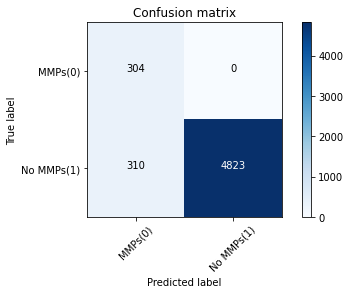

In [39]:
## Gaussian naive
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))
pred = gnb.predict(X_test)
cnf_matrix=confusion_matrix(y_test, pred)
print(classification_report(y_test, pred))
plot_confusion_matrix(cnf_matrix, classes=['MMPs(0)','No MMPs(1)'],normalize=False,  title='Confusion matrix')


### SVM

Accuracy of SVM classifier on training set: 0.98
Accuracy of SVM classifier on test set: 0.98
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       304
           1       1.00      0.98      0.99      5133

    accuracy                           0.98      5437
   macro avg       0.85      0.99      0.91      5437
weighted avg       0.98      0.98      0.98      5437

Confusion matrix, without normalization
[[ 304    0]
 [ 126 5007]]


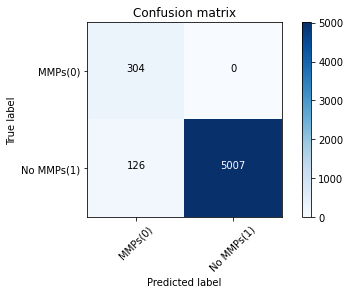

In [40]:
## SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))
pred = svm.predict(X_test)
cnf_matrix=confusion_matrix(y_test, pred)
print(classification_report(y_test, pred))
plot_confusion_matrix(cnf_matrix, classes=['MMPs(0)','No MMPs(1)'],normalize=False,  title='Confusion matrix')
